# Ethi Medical Products Object Detection

**YOLOv5 Object Detection Training Notebook**

**Step 1: Environment Setup and Imports**

First, we'll import the necessary libraries and set up the environment.

In [5]:
# Import libraries for file handling and data splitting
import os, sys
import random
import shutil
# Verify if the environment is set up properly
# Ensure the necessary dependencies are installed like torch, torchvision, and other YOLOv5 requirements
#!pip install opencv-python torch torchvision
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from logger import Logger
# Set instance of the Logger class
logger = Logger(log_file='../yolo_training.log')
sys.path.append('../yolov5')  # Adjust the path based on your directory structure

**Step 2: Define Paths and Prepare Directories**

We define the paths for the source images and create directories for the training and validation sets.

In [5]:
# Define the directory paths
photos_dir = '../data/photos'  # Directory containing all your images
train_dir = '../data/train/images'  # Directory for training images
val_dir = '../data/valid/images'  # Directory for validation images


try:
    # Create directories for train and validation sets if they don't exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    
    # Print the number of images available
    print(f"Total images available: {len(os.listdir(photos_dir))}")
    logger.info(f'{len(os.listdir(photos_dir))} total images available in {photos_dir}')
except Exception as e:
    logger.info(f'Error: {e}')


Total images available: 2341


**Step 3: Split the Dataset**

Split the images into training and validation datasets with a specified ratio (default is 80% training, 20% validation).

In [6]:
def split_dataset(source_dir, train_dir, val_dir, split_ratio=0.8):
    # List all images in the source directory
    images = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]
    random.shuffle(images)  # Shuffle the images for random selection

    # Calculate the split index
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    val_images = images[split_index:]

    # Copy images to the respective directories
    for image in train_images:
        shutil.copy(os.path.join(source_dir, image), train_dir)
    for image in val_images:
        shutil.copy(os.path.join(source_dir, image), val_dir)
    
    print(f"Training images: {len(train_images)}")
    print(f"Validation images: {len(val_images)}")


if __name__=='__main__':
    
    try:
        # Call the function to split the dataset
        split_dataset(photos_dir, train_dir, val_dir)
        logger.info(f'Splited the dataset into train and validation sets.')
    except Exception as e:
        logger.info(f'Error: {e}')


Training images: 1872
Validation images: 469


**Step 4: Prepare YOLOv5 Environment**

Clone the YOLOv5 repository if it isn't already cloned, and install the necessary requirements.

In [4]:
# Clone the YOLOv5 repository (only run this if you don't have YOLOv5 cloned already)

# uncomment below line, and run the cell

#!git clone https://github.com/ultralytics/yolov5.git

# Change the working directory to yolov5

# uncomment below line, and run the cell
#%cd yolov5

# Install required packages for YOLOv5
# uncomment below line, and run the cell

#!pip install -r requirements.txt

#' to automatically track and visualize YOLOv5 🚀 runs in Comet
# uncomment below line, and run the cell
#%pip install comet_ml


**Step 5: Create the Data YAML File**

The YAML file will define paths to training and validation data, the number of classes, and their names.

In [4]:
# ethio_medical_dataset.yml
#path: ../data  # Path to your images directory relative to the yolov5 directory
#train: ../data/images/train  # Path to the training set
#val: ../data/images/val  # Path to the validation set

# Classes
#nc: 1  # Number of classes (adjust based on your needs)
#names: ['product']  # Class names


**Step 6: Train the YOLOv5 Model**

Train the model using the dataset and configuration set up in the previous steps.

Downloading labeled dataset from roboflow

In [19]:
#%pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="eDraTy7oHELDj6QbeQ2L")
project = rf.workspace("medical-products").project("medical-products")
version = project.version(1)
dataset = version.download("yolov5")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to medical-products-1 in yolov5pytorch:: 100%|██████████| 392/392 [00:00<00:00, 3785.49it/s]


**Use a Pretrained Model (Transfer Learning)**

Fine-tuning a smaller pre-trained model (like yolov5n.pt or yolov5s.pt instead of larger models like yolov5x.pt) will use less memory:
- Decrease the Batch Size
- Reduce Image Size

In [2]:
# Train the model using the pre-trained YOLOv5 model checkpoint (yolov5s.pt)
#!python train.py --img 640 --batch 16 --epochs 50 --data ethio_medical_dataset.yml --weights yolov5s.pt
# Run this in your notebook cell
#!python ../yolov5/train.py --img 640 --batch 16 --epochs 50 --data ../notebooks/ethio_medical_dataset.yml --weights yolov5s.pt --name fine_tuned_model
!python ../yolov5/train.py --img 320 --batch 8 --epochs 50 --data ../notebooks/ethio_medical_dataset.yml --weights yolov5n.pt --name fine_tuned_model


train: weights=yolov5n.pt, cfg=, data=../notebooks/ethio_medical_dataset.yml, hyp=../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=../yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../yolov5/runs/train, name=fine_tuned_model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-372-ga3555241 Python-3.11.6 torch-2.4.1+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, bo

**Step 5: Processing the Detection Results**

Extract relevant data from the detection results, such as bounding box coordinates, confidence scores, and class labels.

To process detection results using YOLOv5 and extract relevant data, we can modify the inference script (detect.py) or create a custom script that reads the detection outputs. Below is a step-by-step guide:

**Step 1: Predict the the whole images dataset**

Based on the transfer learning and trained small subset of the labeled data, predict the whole images

In [27]:
!python ../yolov5/detect.py --weights ../yolov5/runs/train/fine_tuned_model12/weights/best.pt --img 320 --conf 0.25 --save-conf --source ../data/photos --name predictions --save-txt


detect: weights=['../yolov5/runs/train/fine_tuned_model12/weights/best.pt'], source=../data/photos, data=../yolov5/data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../yolov5/runs/detect, name=predictions, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-372-ga3555241 Python-3.11.6 torch-2.4.1+cu121 CPU

Fusing layers... 
[W1014 15:47:17.562620578 NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 1771342 parameters, 0 gradients, 4.2 GFLOPs
image 1/2341 /home/noh/10Academy/EthiomedDataWarehouse/data/photos/@lobelia4cosmetics_10013.jpg: 320x320 (no detections), 81.8ms
image 2/2341 /home/noh/10Academy/EthiomedDataWarehouse/data/photo

**Storing detection data to a database table**

In [30]:
!python ../scripts/store_detection_results.py


Connection to the database established successfully.
Detection results stored successfully.


Display the results in the plot

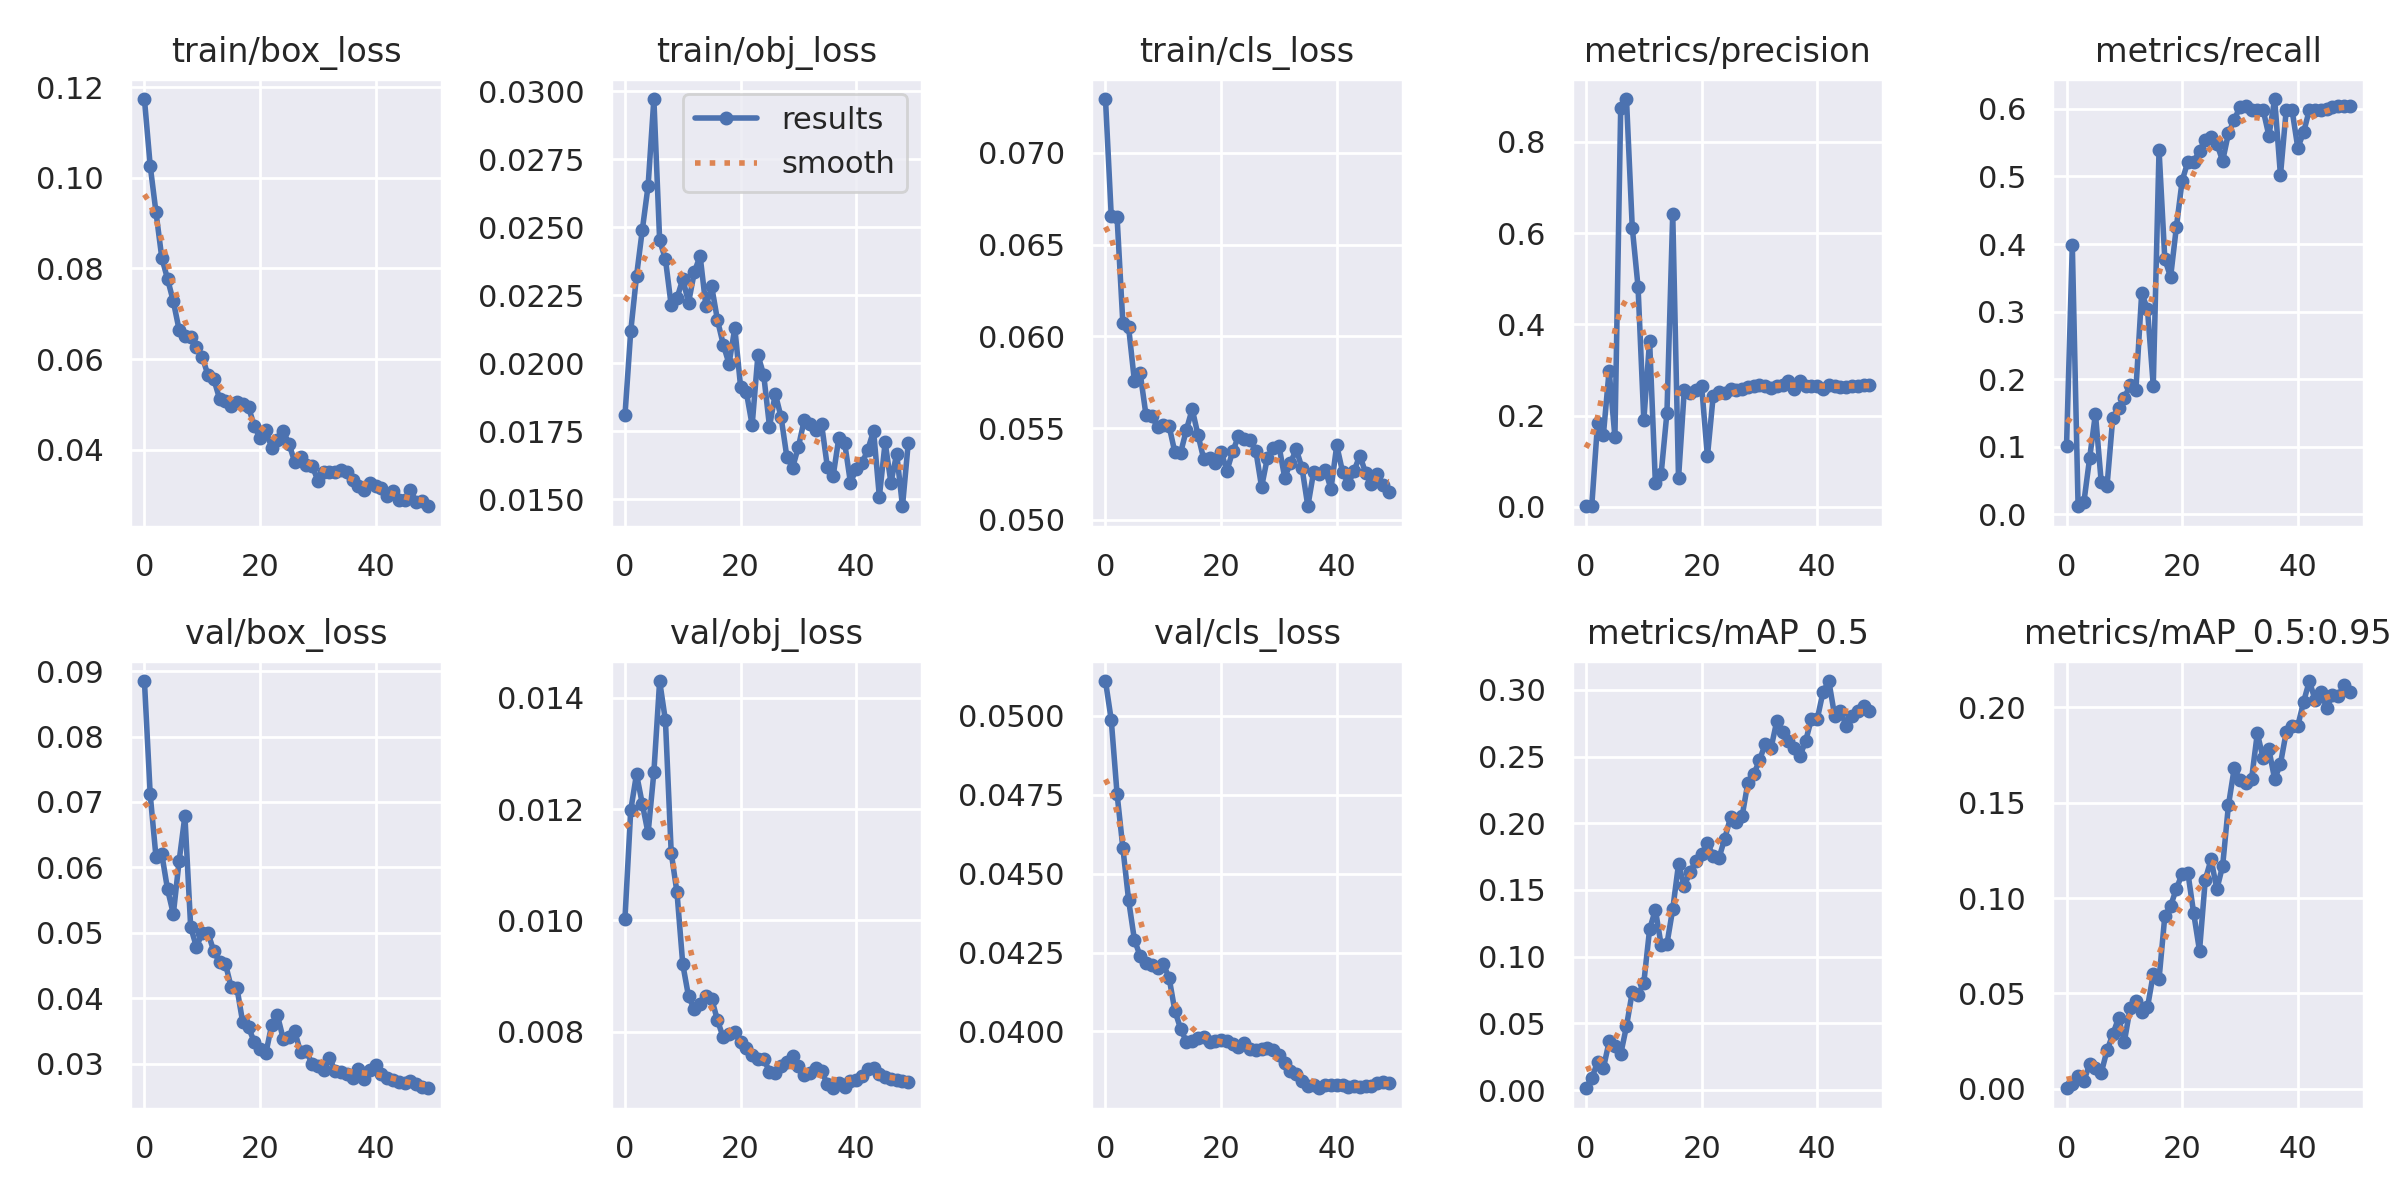

In [3]:
from IPython.display import Image, display

# Replace this with the path to your PNG results
png_file_path = '../yolov5/runs/train/fine_tuned_model12/results.png'  # Adjust the path accordingly

# Display the PNG image
display(Image(filename=png_file_path))


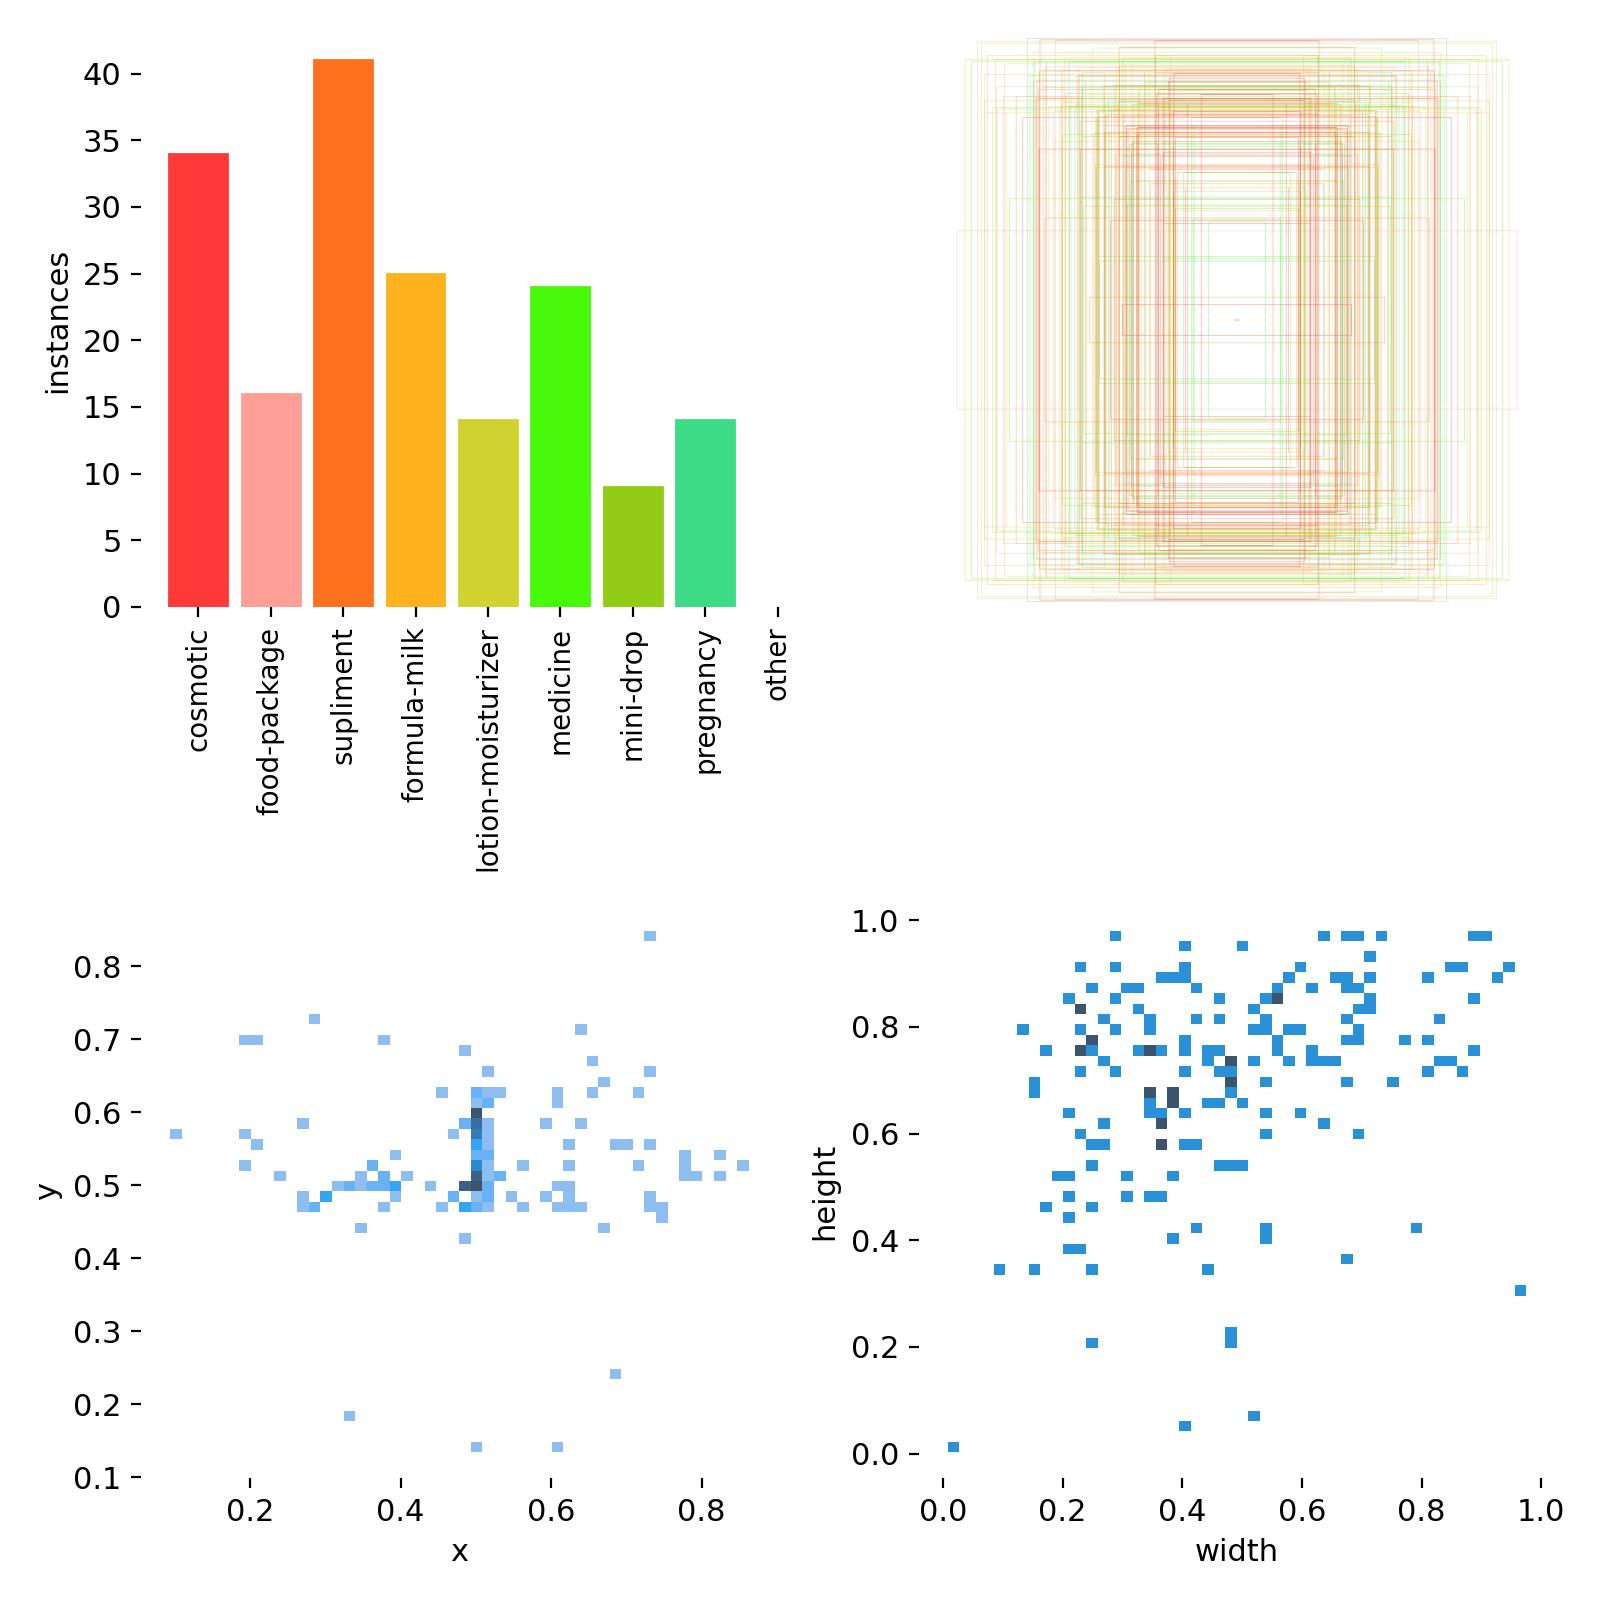

In [5]:
# Replace this with the path to your PNG results
png_file_path = '../yolov5/runs/train/fine_tuned_model12/labels.jpg'  # Adjust the path accordingly

# Display the PNG image
display(Image(filename=png_file_path))

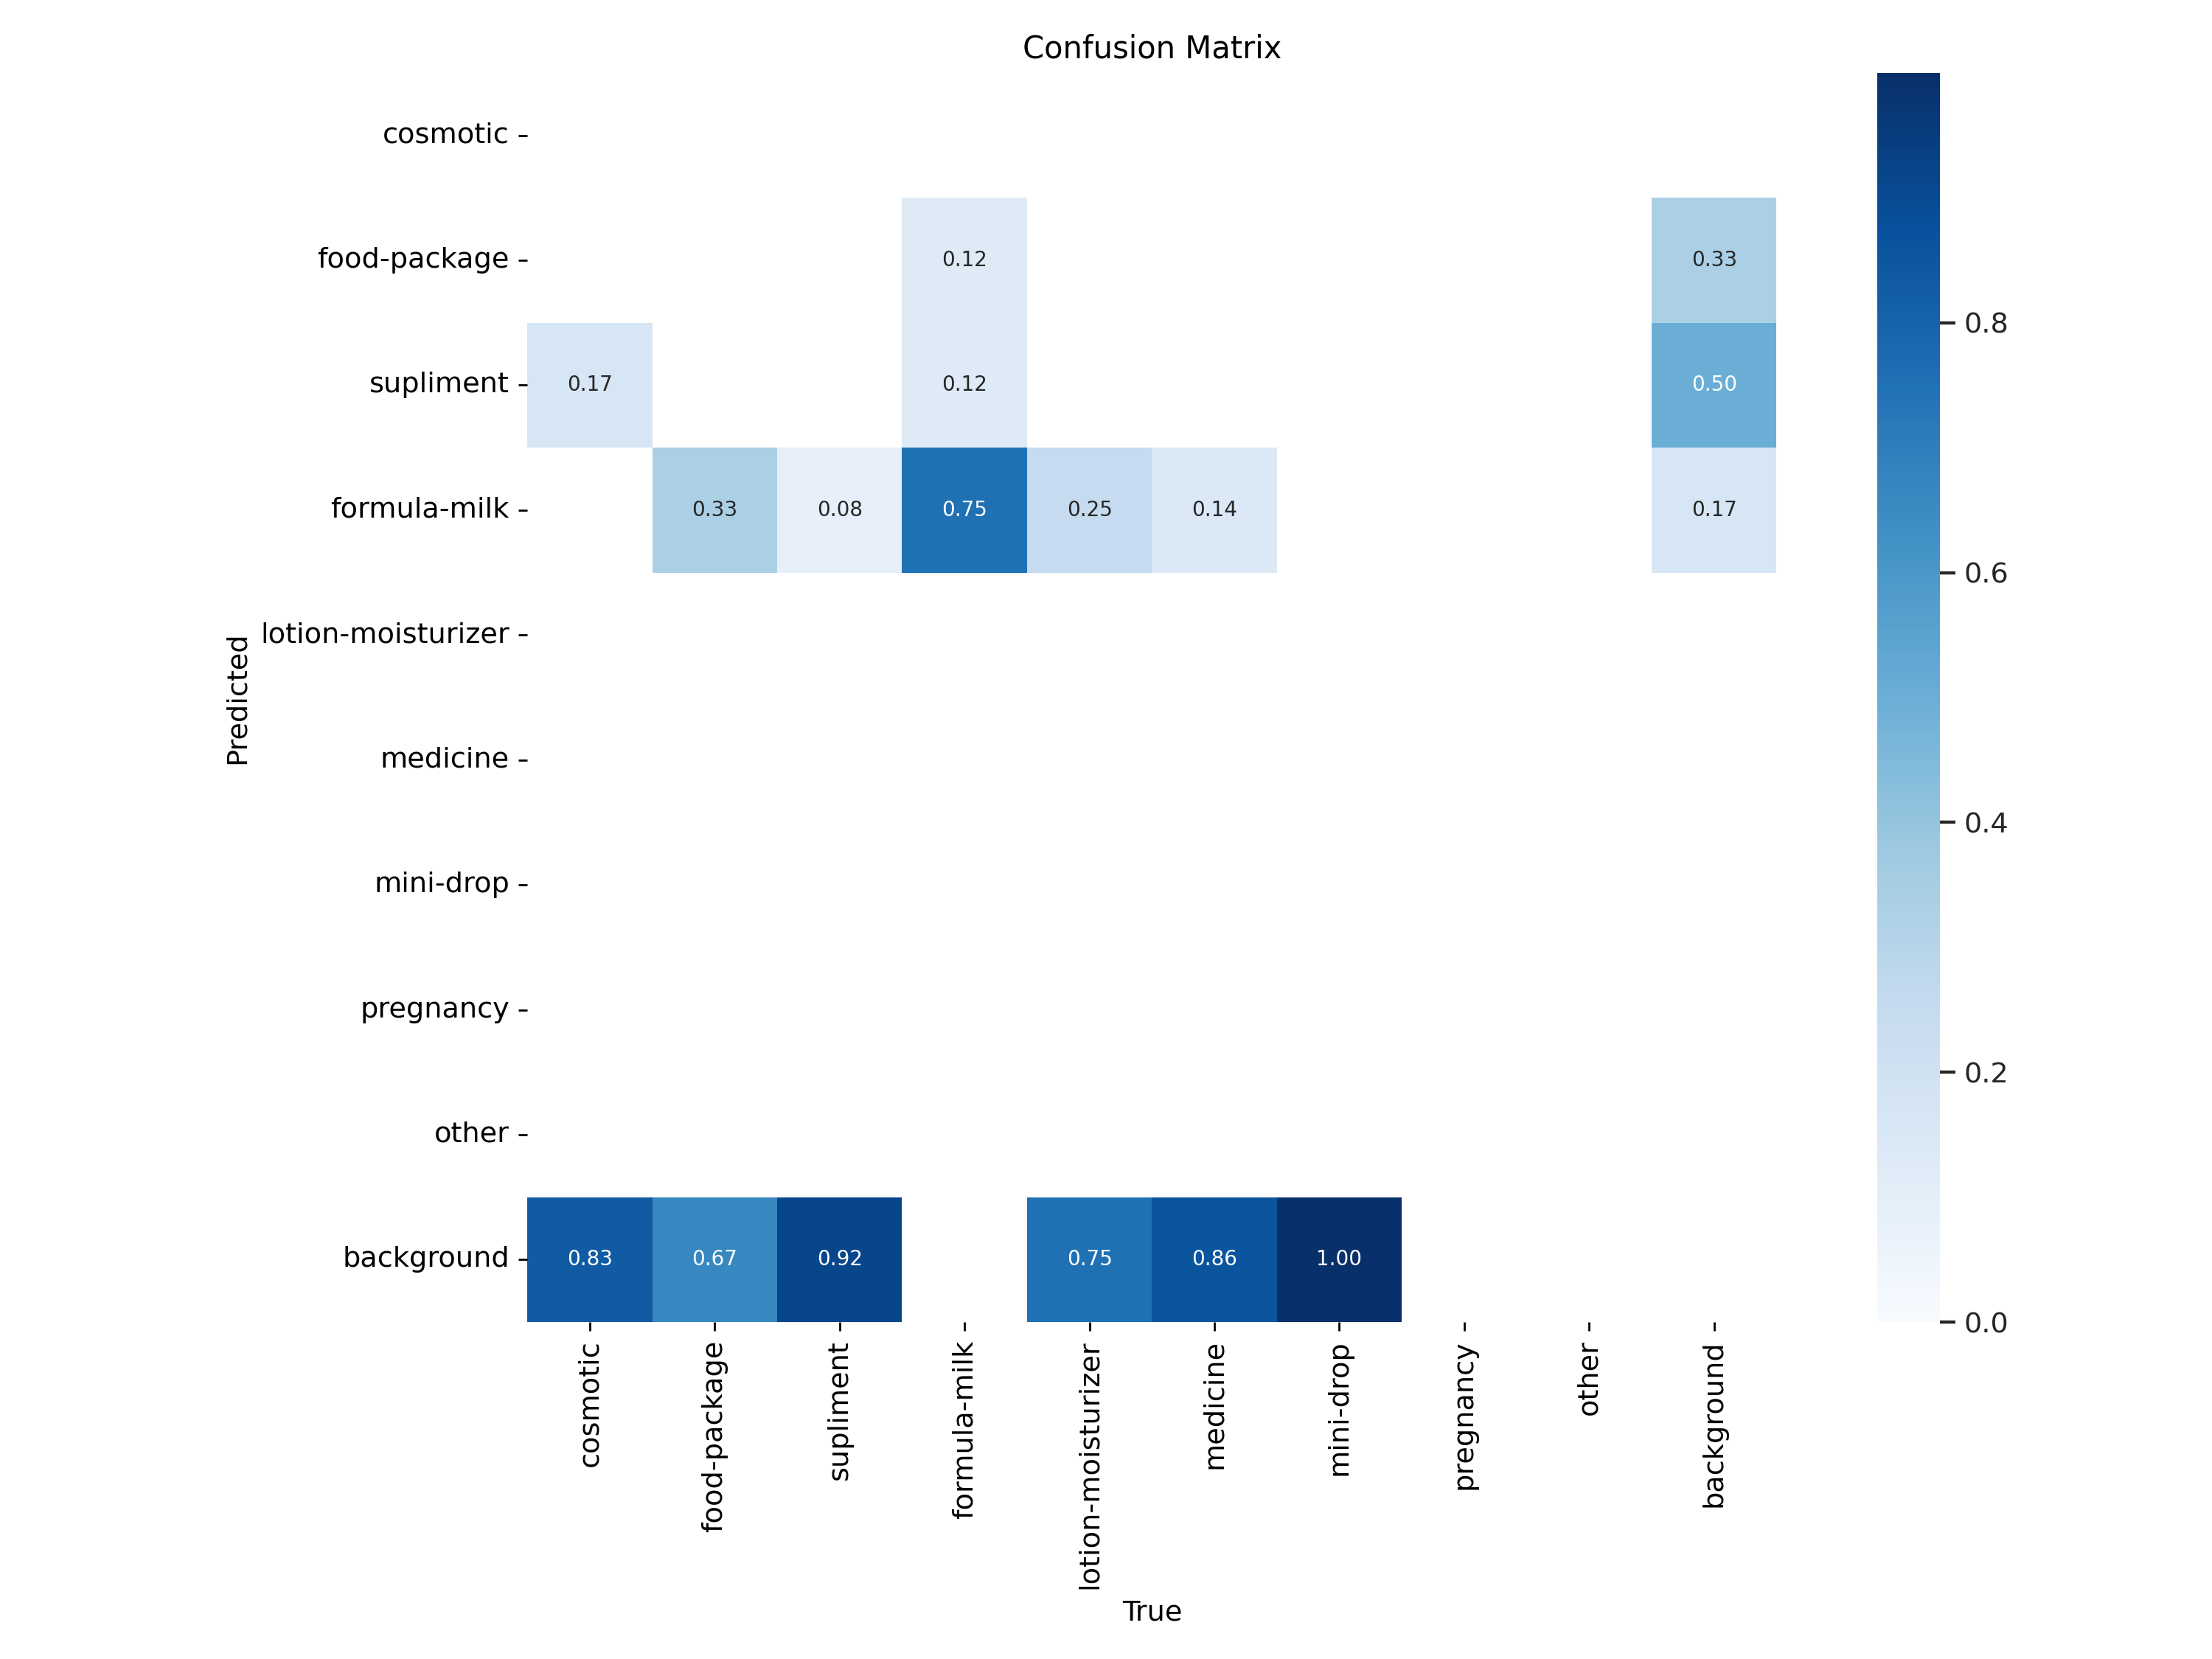

In [7]:
# Replace this with the path to your PNG results
png_file_path = '../yolov5/runs/train/fine_tuned_model12/confusion_matrix.png'  # Adjust the path accordingly

# Display the PNG image
display(Image(filename=png_file_path))

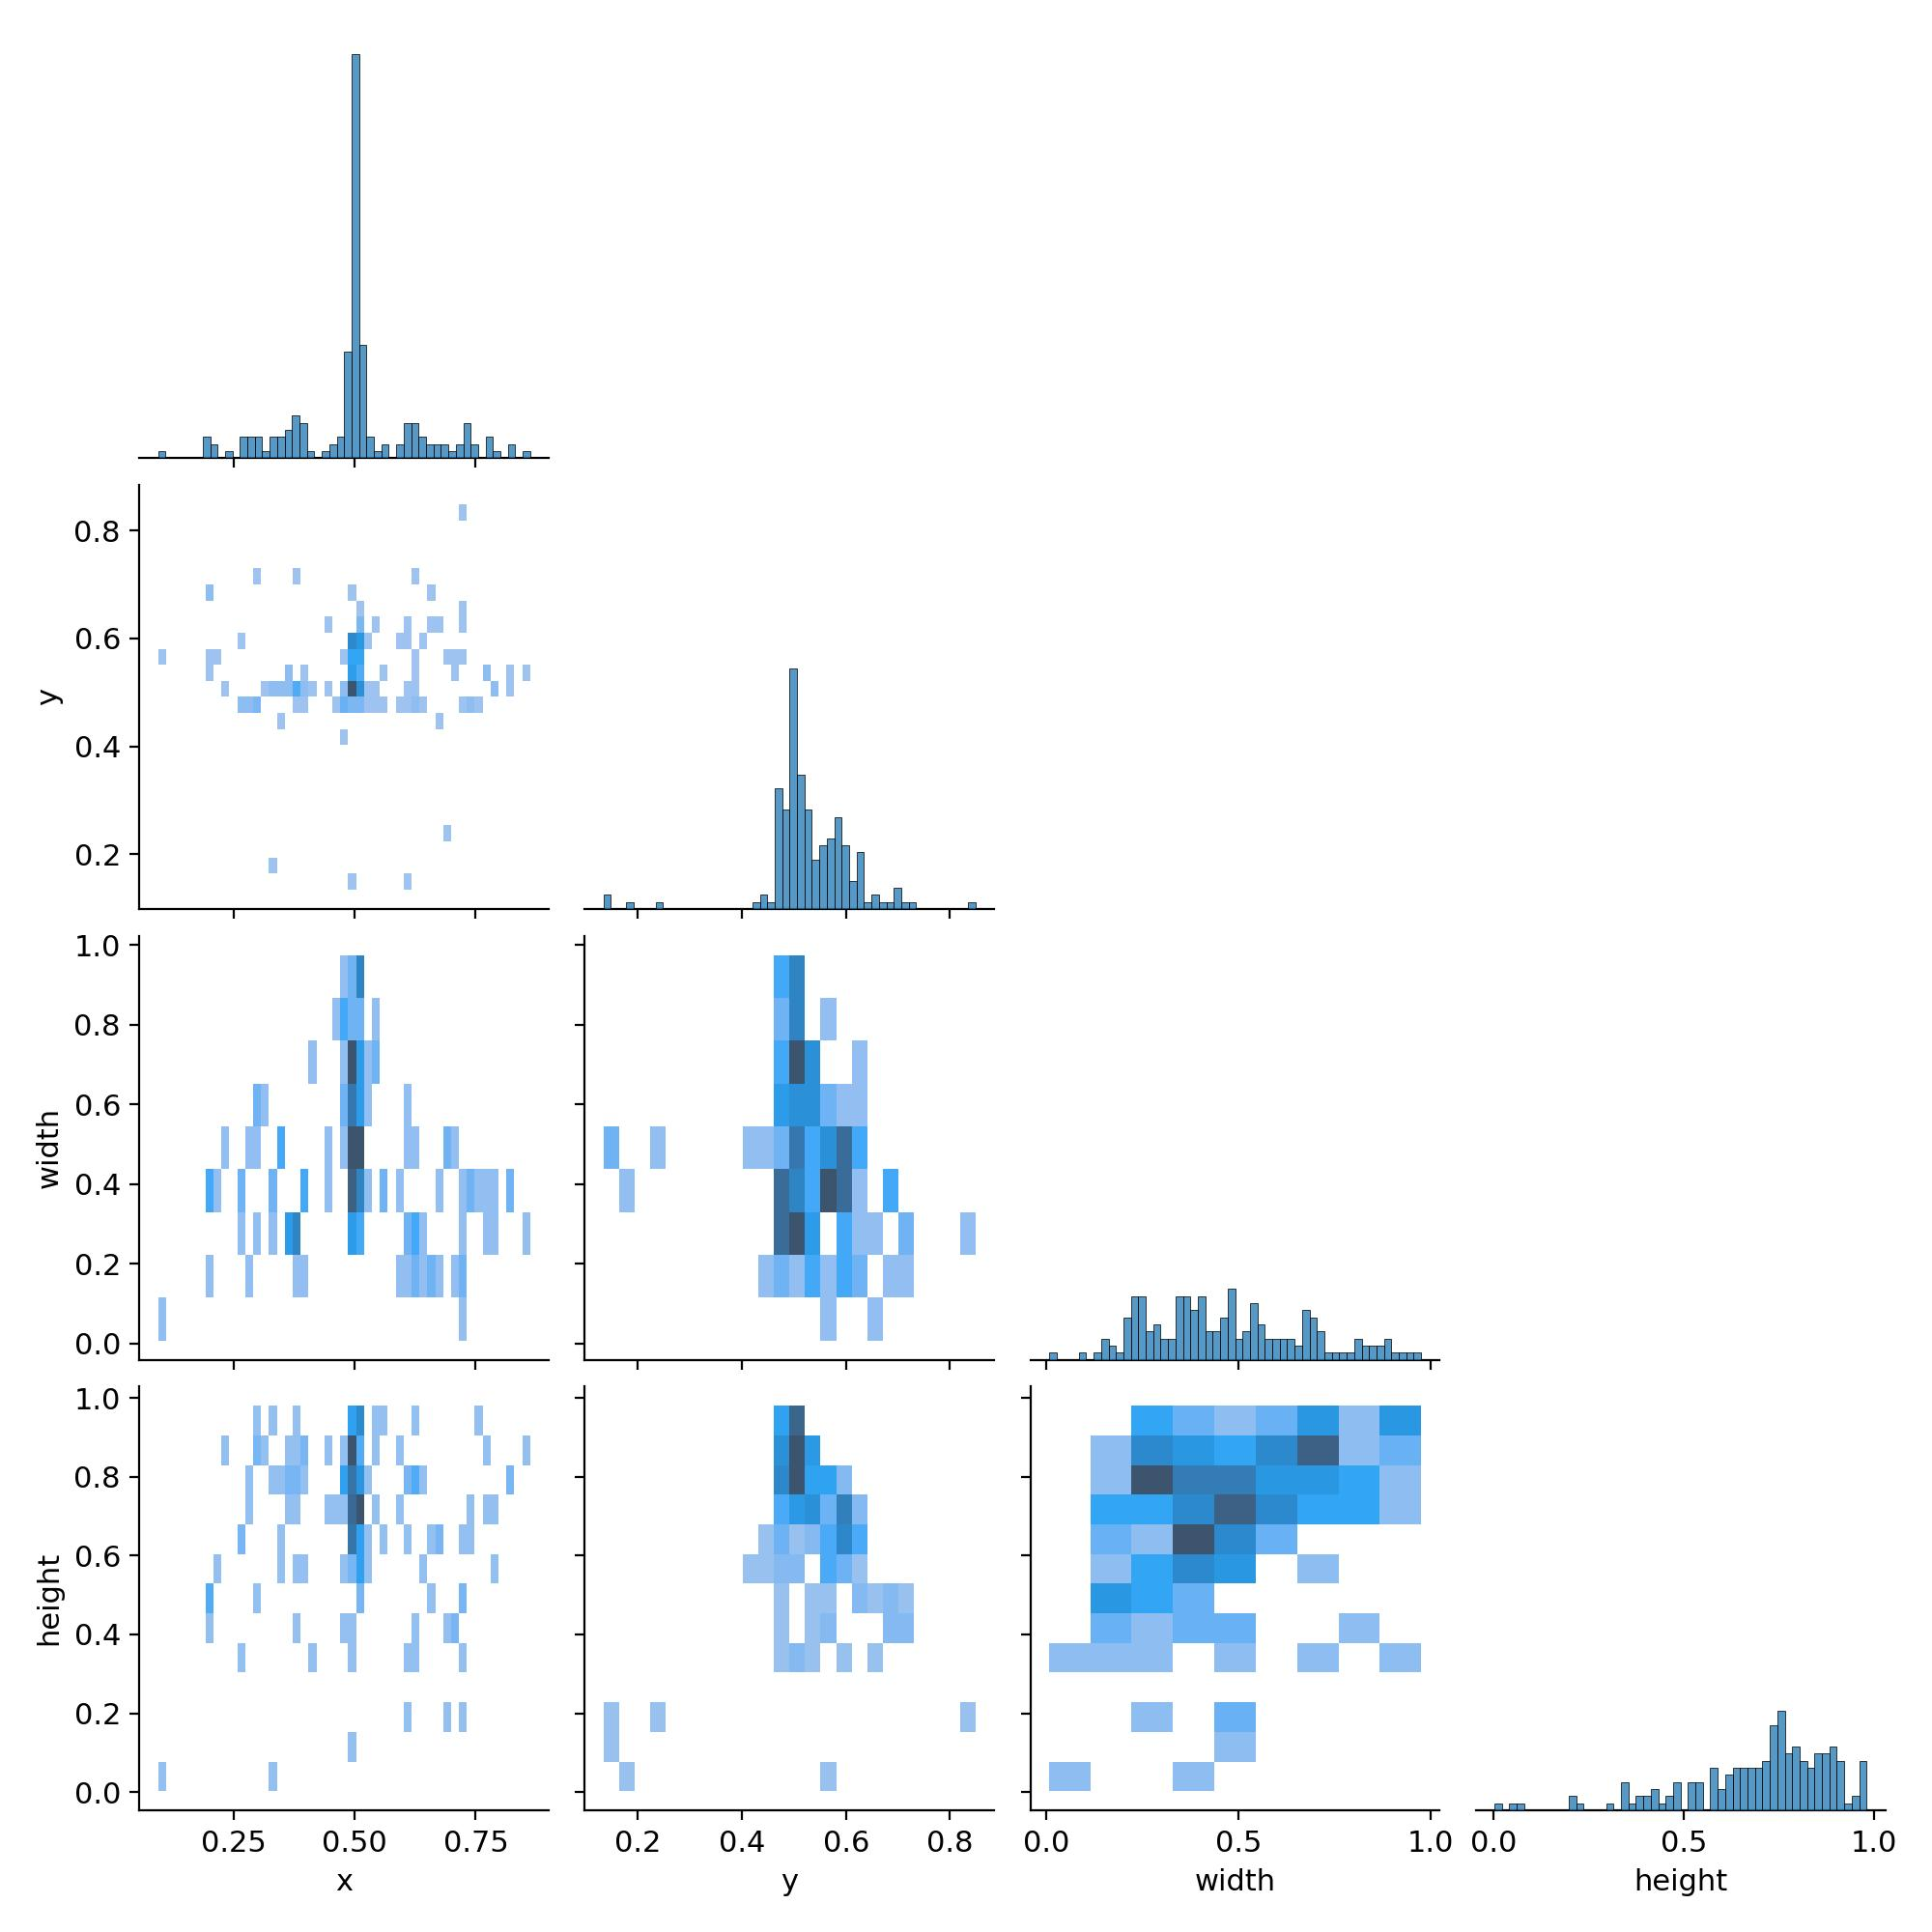

In [8]:
# Replace this with the path to your PNG results
png_file_path = '../yolov5/runs/train/fine_tuned_model12/labels_correlogram.jpg'  # Adjust the path accordingly

# Display the PNG image
display(Image(filename=png_file_path))

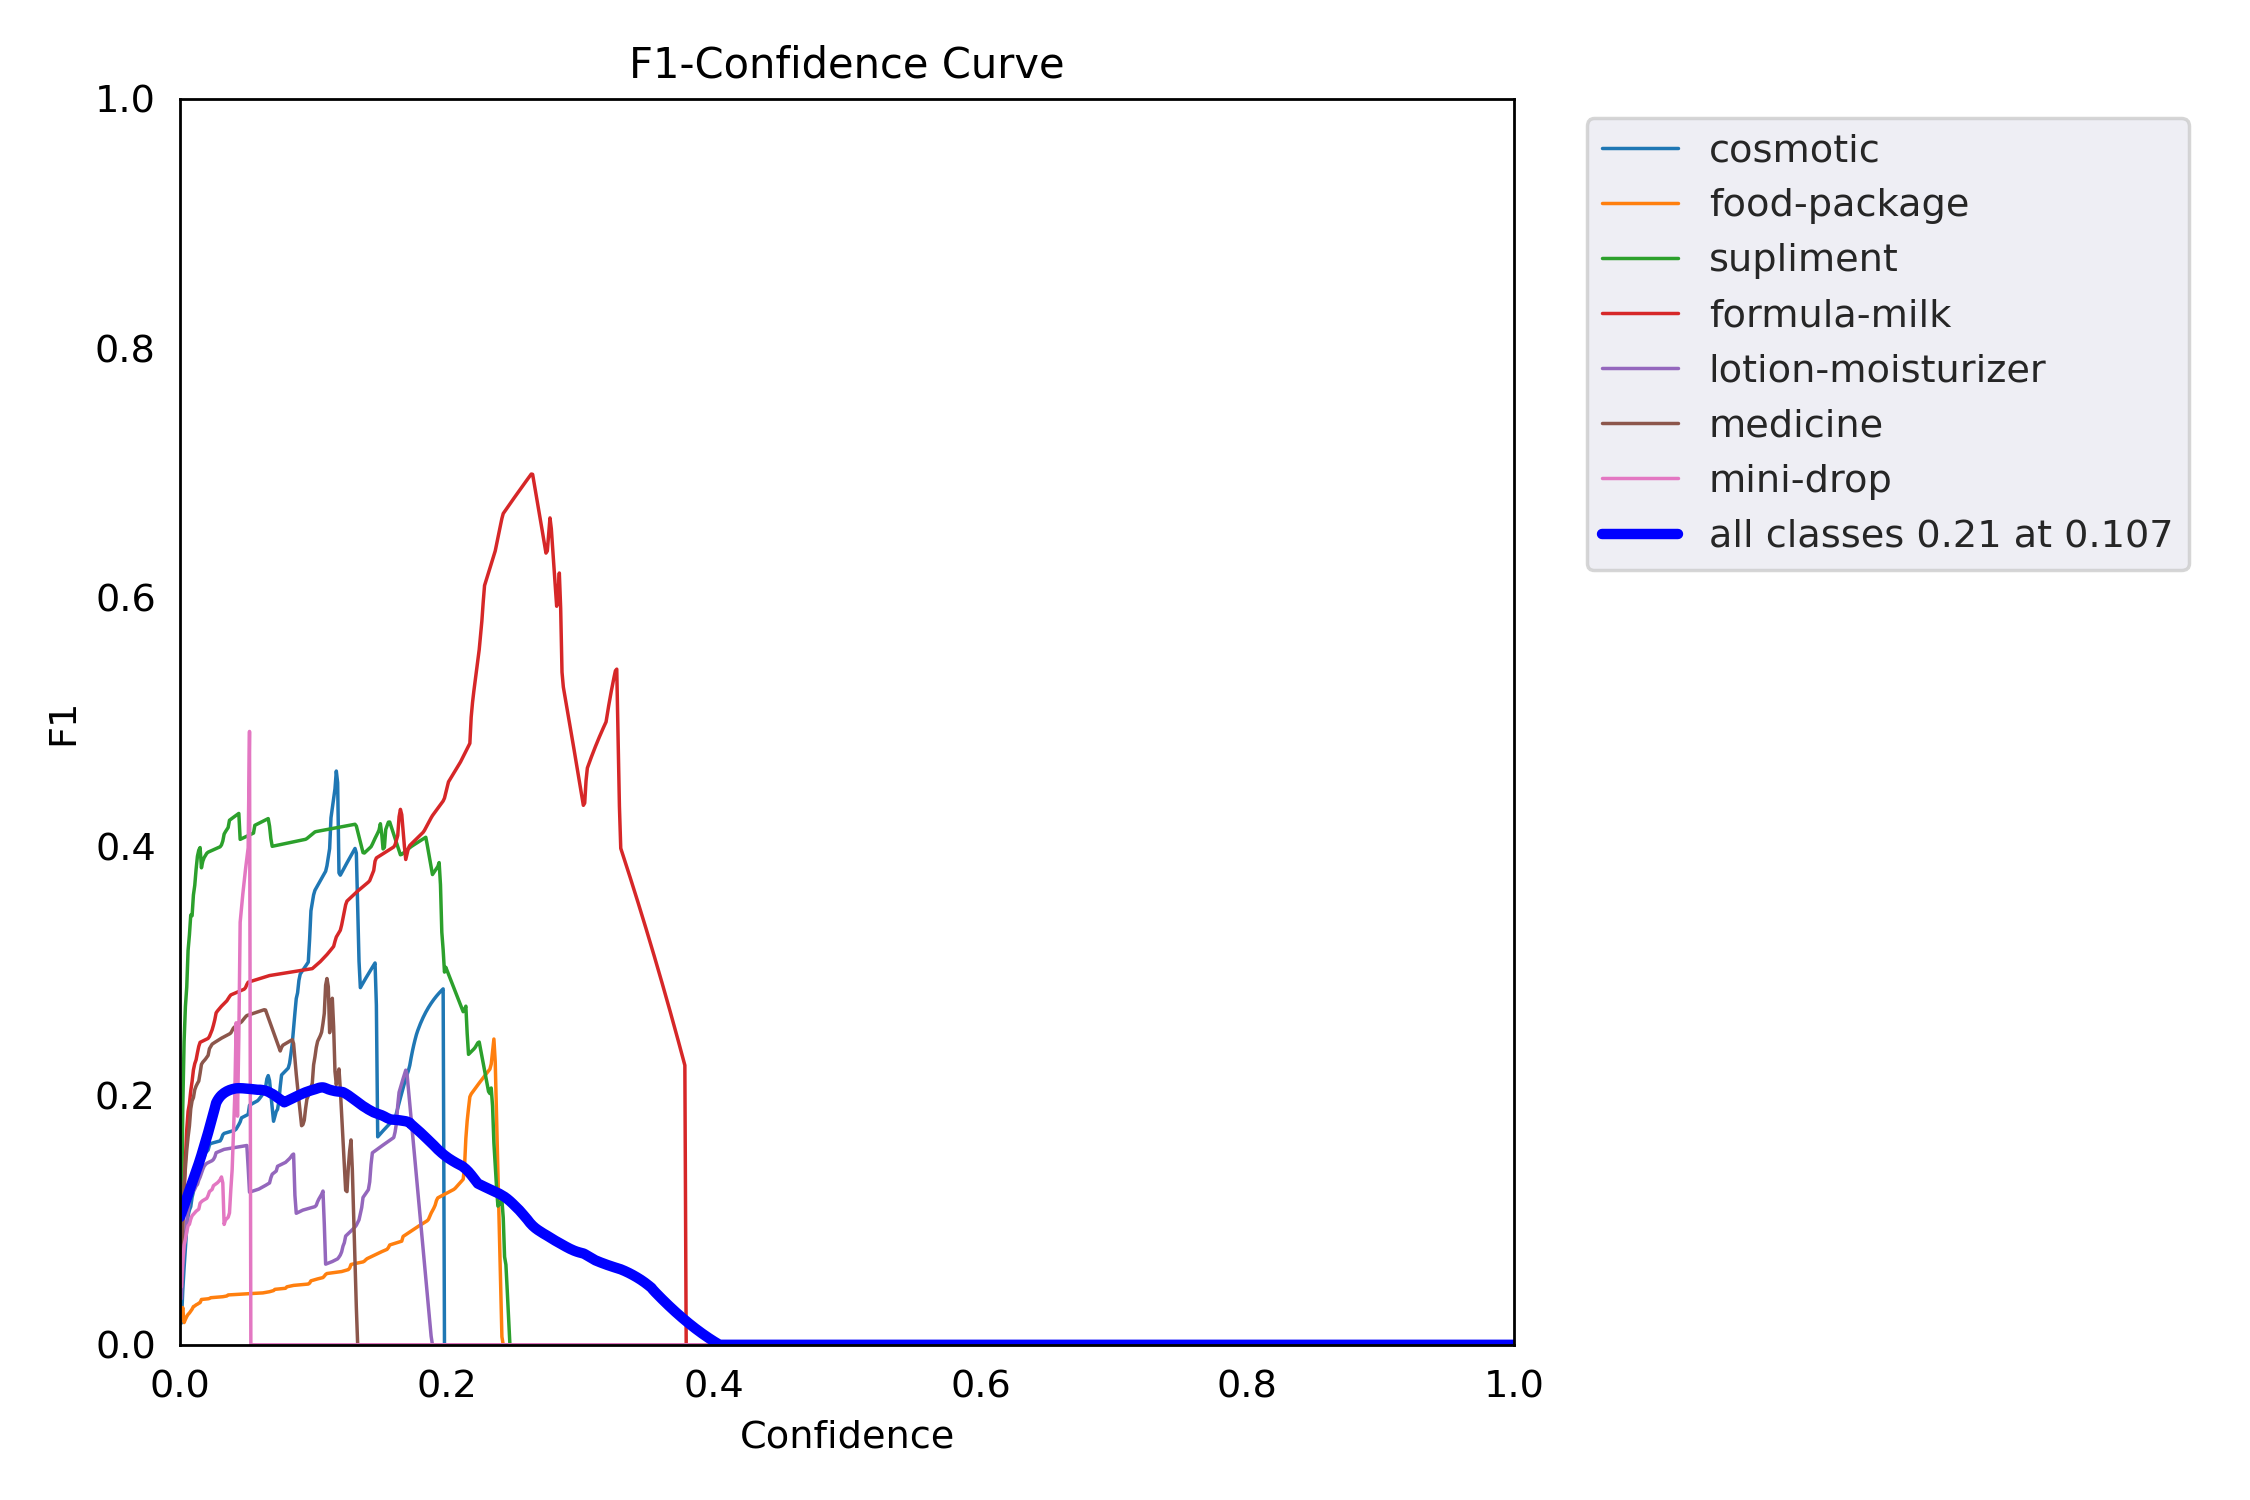

In [9]:
# Replace this with the path to your PNG results
png_file_path = '../yolov5/runs/train/fine_tuned_model12/F1_curve.png'  # Adjust the path accordingly

# Display the PNG image
display(Image(filename=png_file_path))

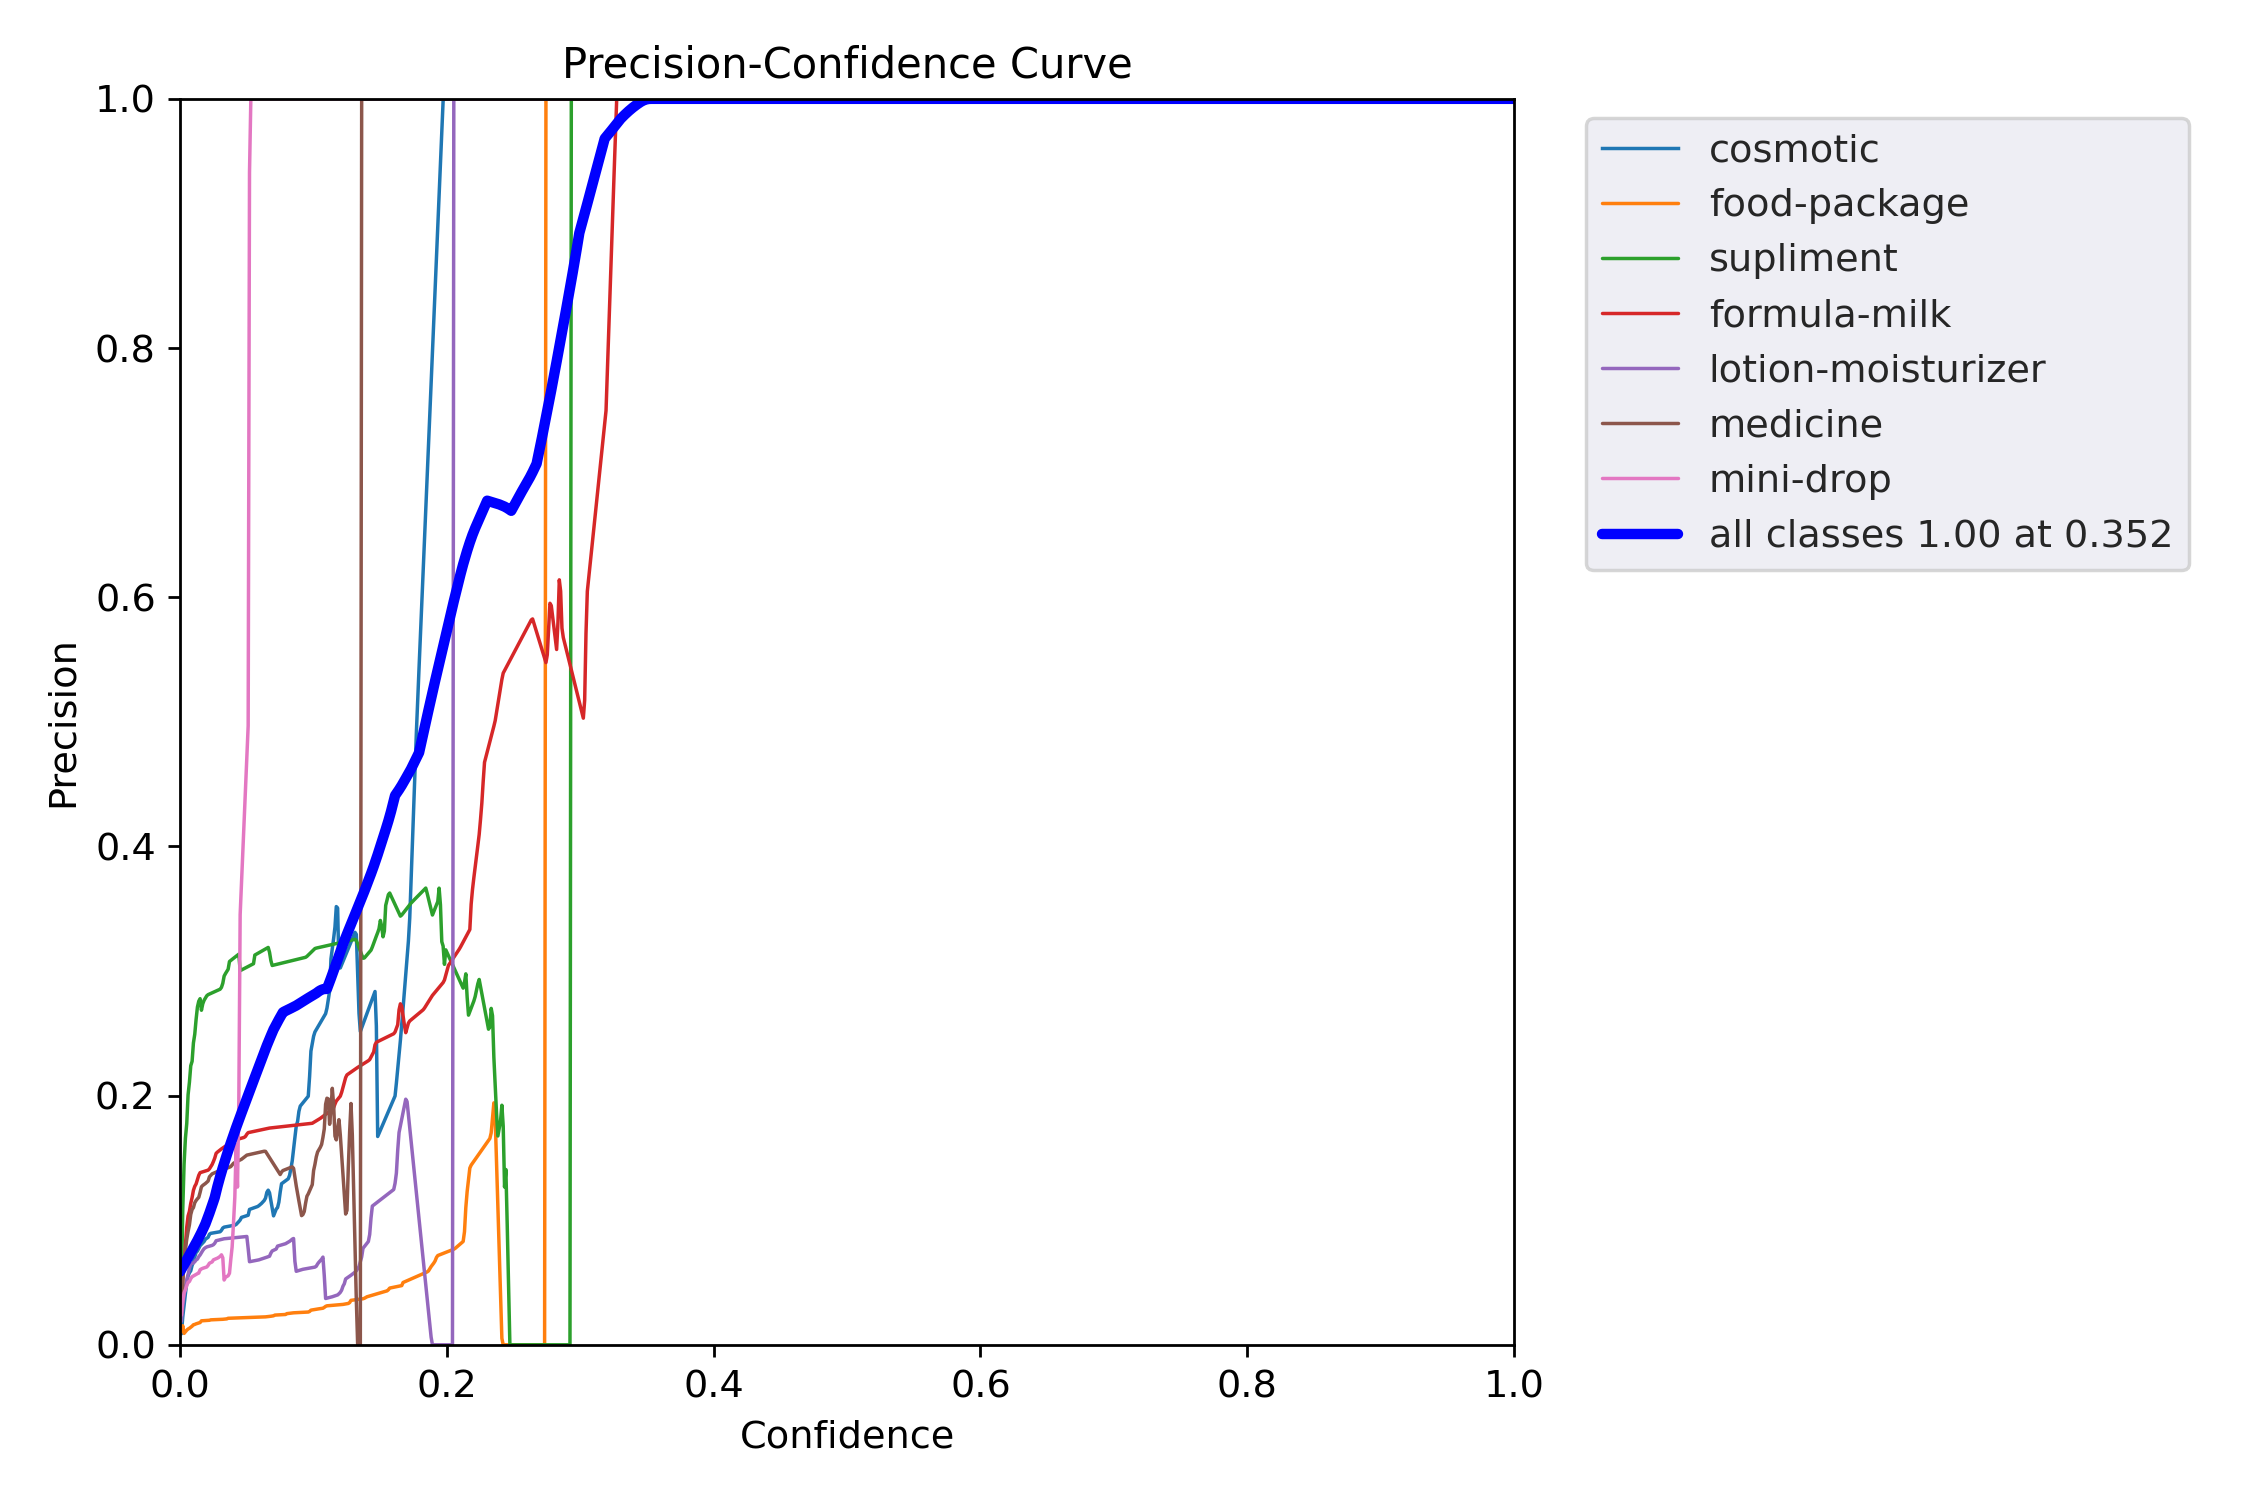

In [10]:
# Replace this with the path to your PNG results
png_file_path = '../yolov5/runs/train/fine_tuned_model12/P_curve.png'  # Adjust the path accordingly

# Display the PNG image
display(Image(filename=png_file_path))

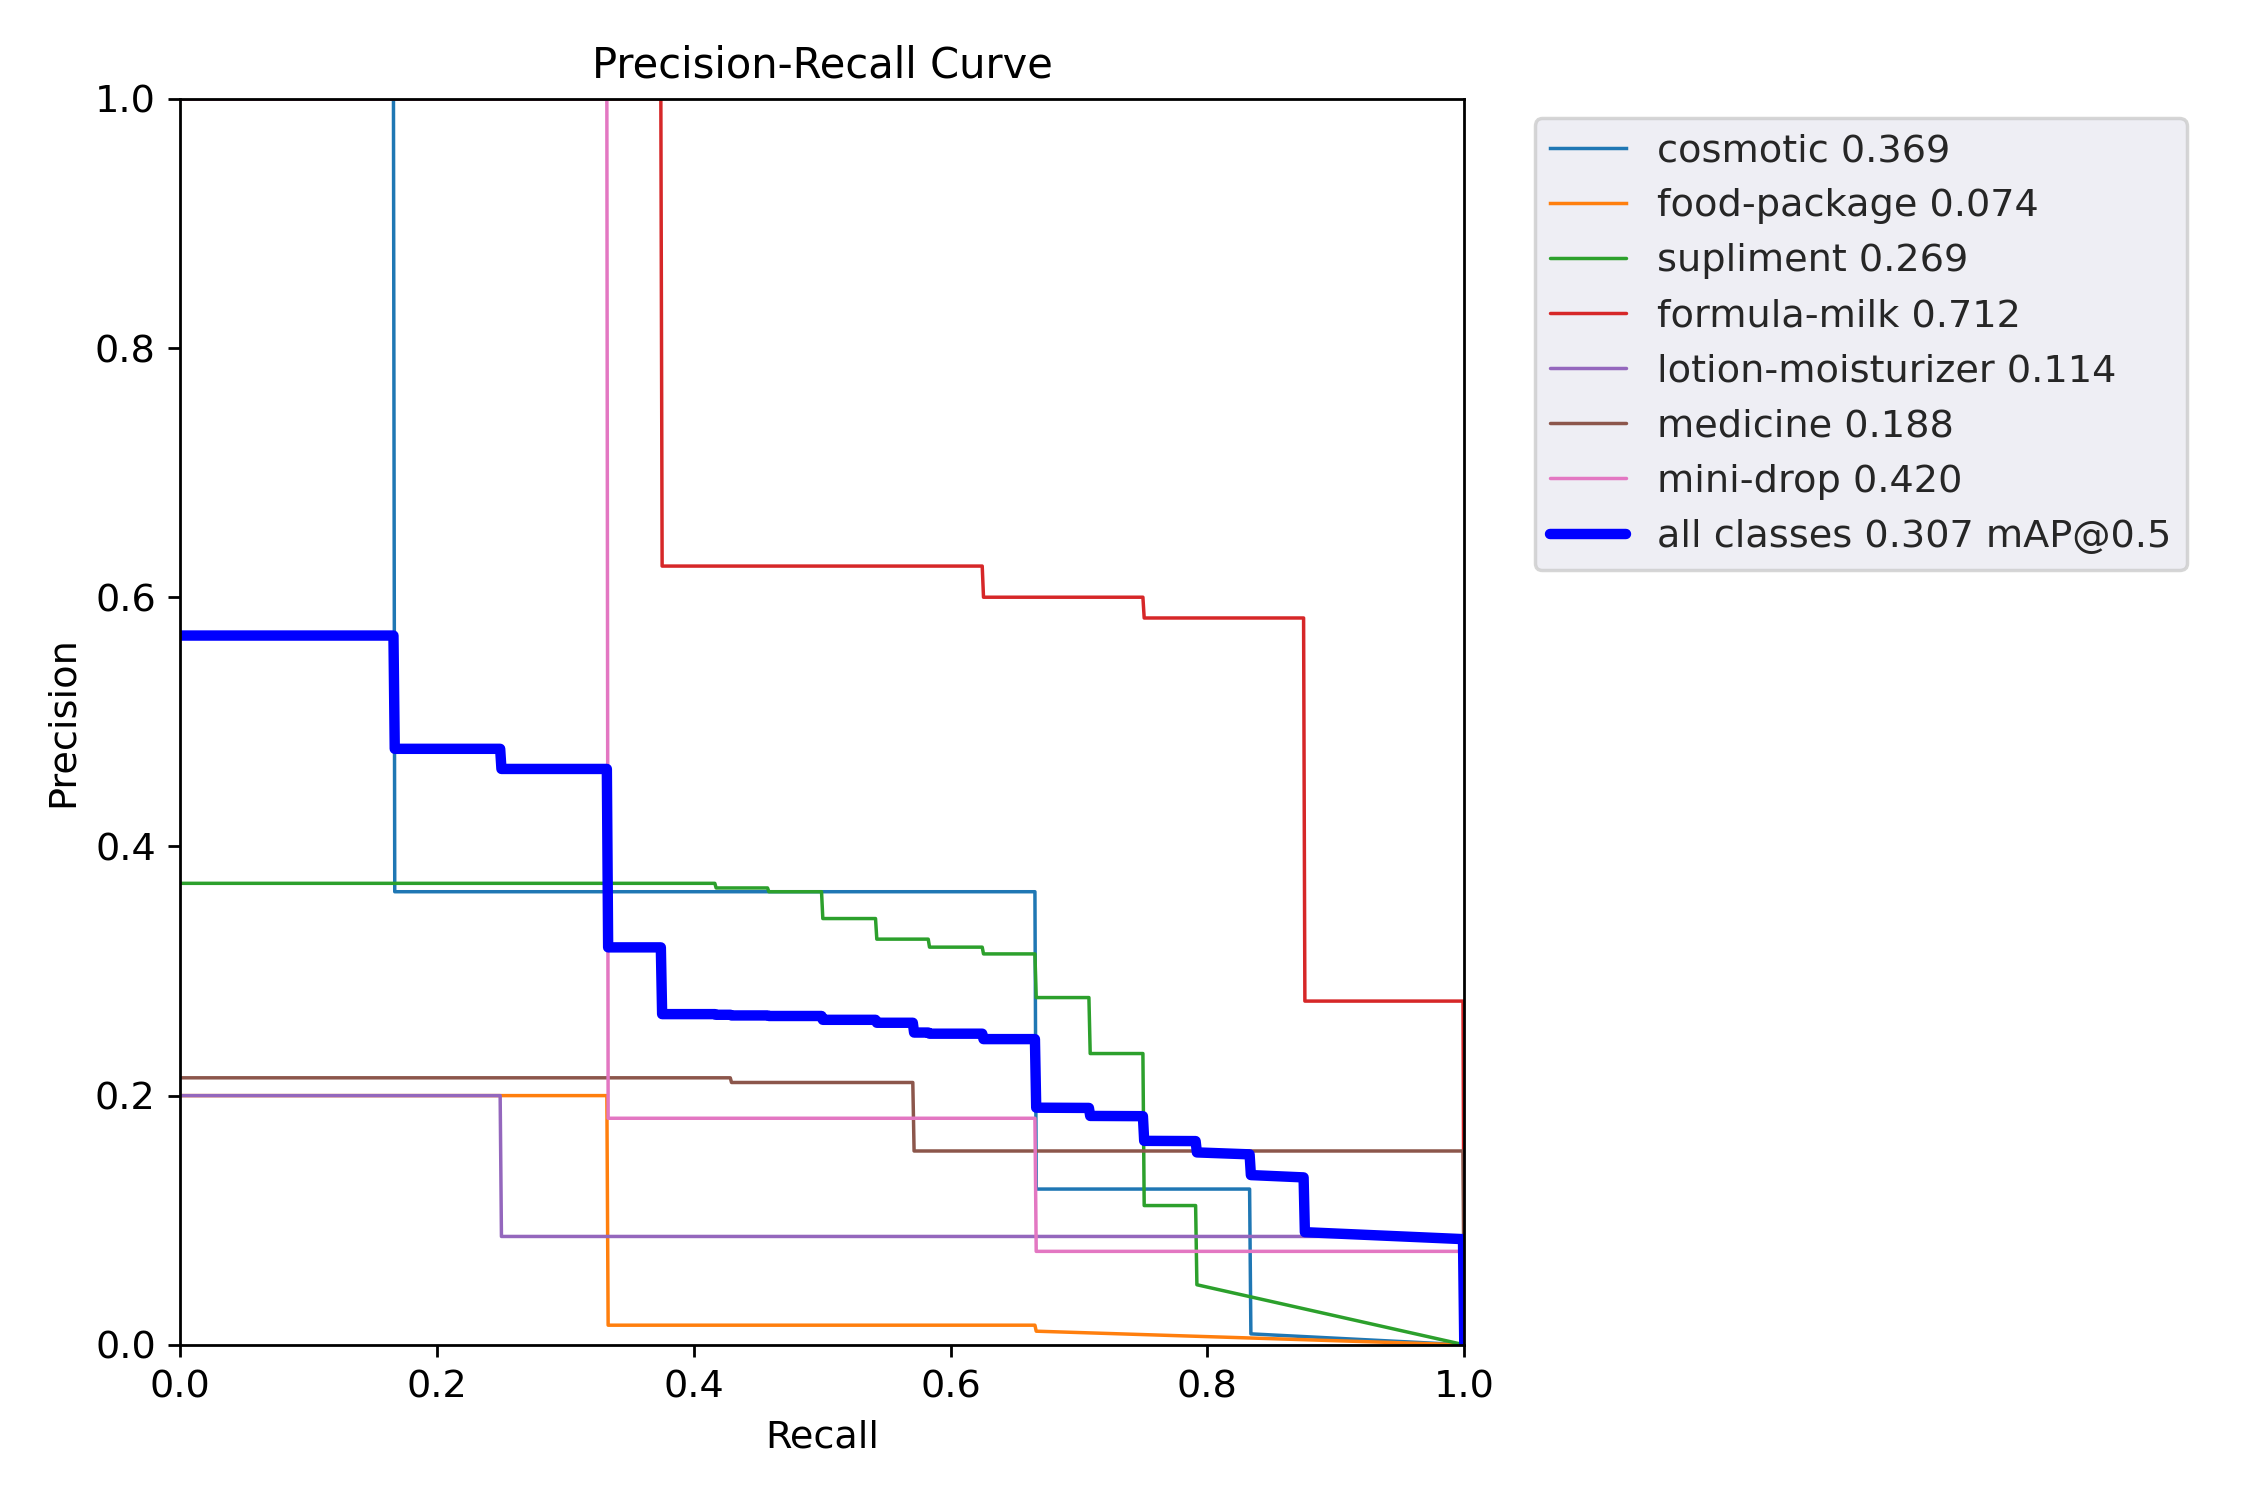

In [11]:
# Replace this with the path to your PNG results
png_file_path = '../yolov5/runs/train/fine_tuned_model12/PR_curve.png'  # Adjust the path accordingly

# Display the PNG image
display(Image(filename=png_file_path))

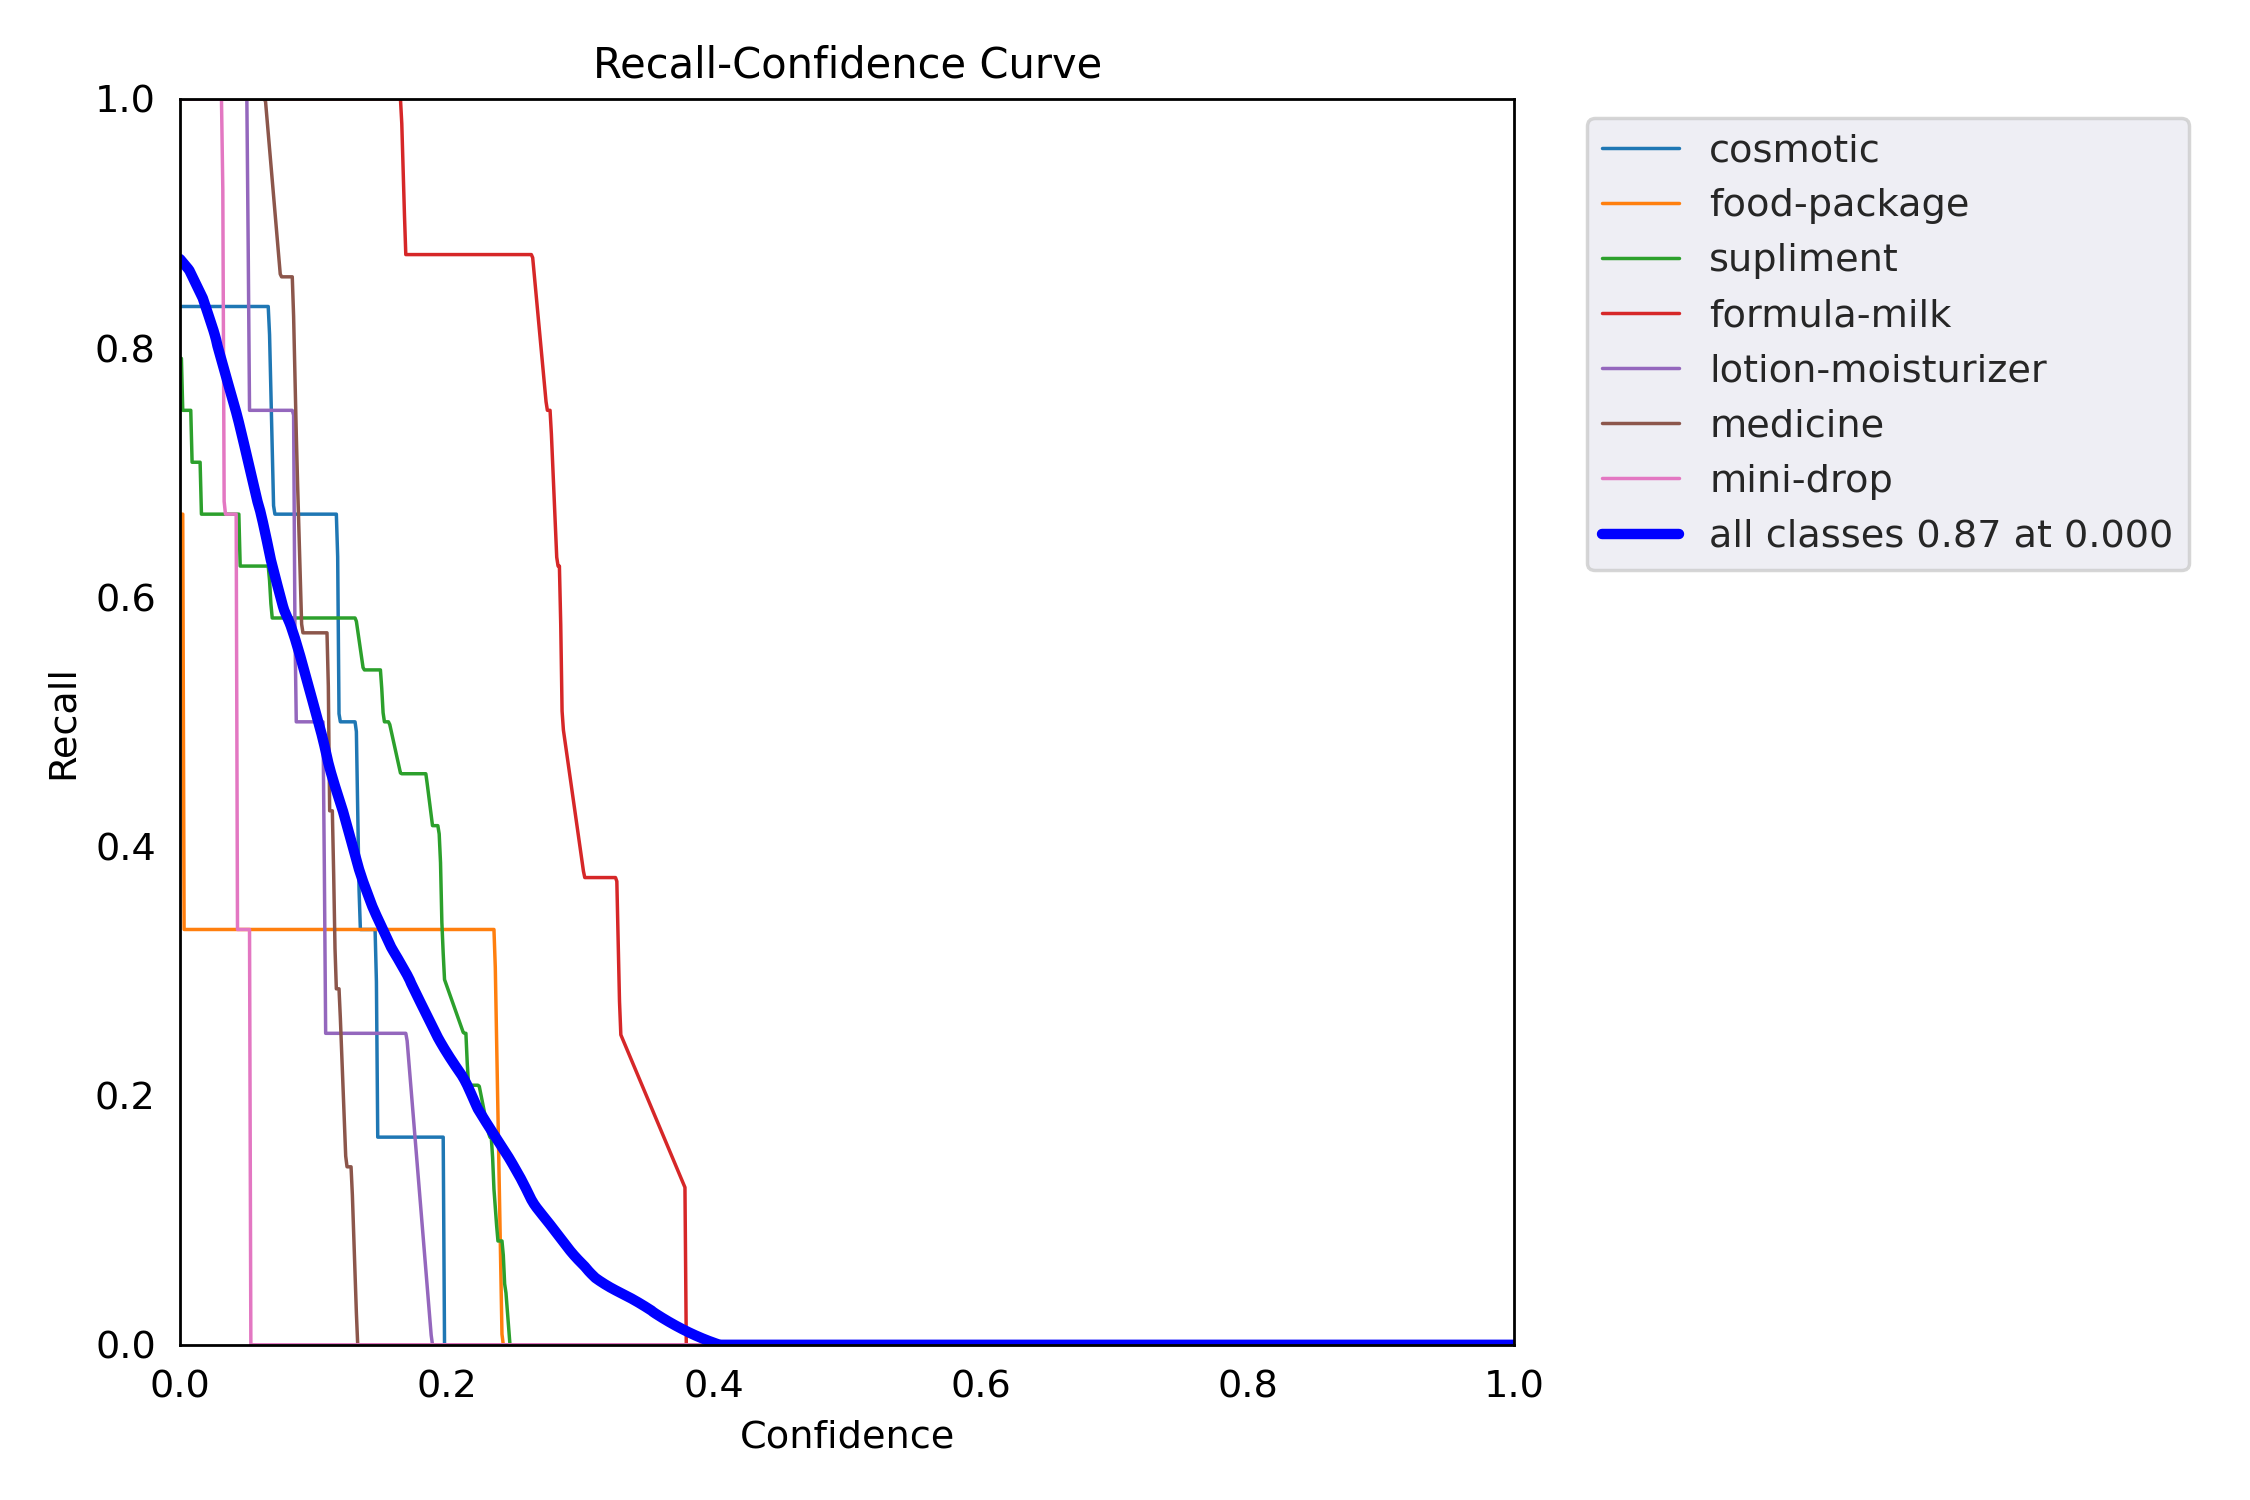

In [12]:
# Replace this with the path to your PNG results
png_file_path = '../yolov5/runs/train/fine_tuned_model12/R_curve.png'  # Adjust the path accordingly

# Display the PNG image
display(Image(filename=png_file_path))